# Plot ROC Curve

### mnist data를 학습 후, 특정 class를 선택해서 scikit-learn 라이브러리로 ROC Curve Graph를 그려보고 AUC 값도 구해본다.

In [1]:
##tenssorflow==2.3 환경에서 구현 
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

(mnist_train, mnist_train_label), (mnist_test, mnist_test_label) = mnist.load_data() #mnist data road
#normalization 적용
mnist_train=mnist_train/255
mnist_test=mnist_test/255

mnist_train=tf.cast(mnist_train, tf.float32)
mnist_train=np.expand_dims(mnist_train, -1)
mnist_test=tf.cast(mnist_test, tf.float32)
mnist_test=np.expand_dims(mnist_test, -1)

#one hot encoding
train_labels = to_categorical(mnist_train_label, 10)
test_labels = to_categorical(mnist_test_label, 10) 

class_number = 10 

# keras로 모델 구성 후, 학습
inputs = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=16, activation='relu',padding="same")(inputs)
x = tf.keras.layers.MaxPooling2D((2,2),strides=(1, 1))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu',padding="same")(x)
x = tf.keras.layers.MaxPooling2D((2,2),strides=(1, 1))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu',padding="same")(x)
x = tf.keras.layers.MaxPooling2D((2,2),strides=(2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, activation='relu',padding="same")(x)
x = tf.keras.layers.MaxPooling2D((2,2),strides=(2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, activation='relu',padding="same")(x)
x = tf.keras.layers.MaxPooling2D((2,2),strides=(2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(class_number, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(mnist_train, train_labels, epochs=100,validation_split=0.2,verbose=0)
print("train finished")

train finished


In [2]:
#최종 train accuracy 측정 (validation 데이터 포함)
metrics=model.evaluate(mnist_train, train_labels, verbose=2)
print("Train accuracy:", metrics[1])

1875/1875 - 3s - loss: 0.0146 - accuracy: 0.9959
Train accuracy: 0.9958999752998352


In [4]:
#학습한 모델로 mnist test data predict
pred=model.predict(mnist_test)

In [5]:
#one hot encoding된 test data label중에서 숫자 7 class에 해당하는 index 선택
label_seven=test_labels[:,7]
#모델이 예측한 결과중에서 숫자 7 class에 해당하는 index 선택
pred_seven=pred[:,7]

In [6]:
import sklearn
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve, recall_score
#ROC curve를 그리기 위한 data 도출
fpr, tpr, thresholds = sklearn.metrics.roc_curve(label_seven, pred_seven)
#AUC 값 도출
auc_result=sklearn.metrics.auc(fpr, tpr)

AUC: 0.9999241045639612


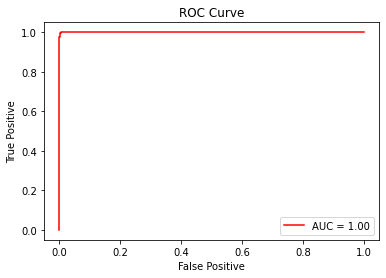

In [7]:
import matplotlib.pyplot as plt
print("AUC:",auc_result)
#ROC curve plot
plt.figure()
plt.title("ROC Curve")
plt.plot(fpr, tpr,'r', label = 'AUC = %0.2f' %auc_result)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc = 'lower right')
plt.show()